In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import urllib

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [4]:
def graph_data(stock):
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month.
                                                          # %d = number day.
                                                          # %H = hours.
                                                          # %M = minutes.
                                                          # %S = seconds.
                                                          # 12-06-2014.
                                                          # %m-%d-%Y.
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    ax1.grid(True)

    # for legend
    ax1.plot([], [], linewidth=5, label='Gain', color='g', alpha=0.5)
    ax1.plot([], [], linewidth=5, label='Loss', color='r', alpha=0.5)
    # the actual plot
    ax1.plot_date(date, closep,'-', label='Price')
    # horizontal line
    ax1.axhline(closep[0], color='k', linewidth=5)
    # color between starting and higher or lower
    ax1.fill_between(date, closep, closep[0], where=(closep > closep[0]), facecolor='g', alpha=0.5) # good
    ax1.fill_between(date, closep, closep[0], where=(closep < closep[0]), facecolor='r', alpha=0.5) # bad
    # rotate labels
    for label in ax1.xaxis.get_ticklabels():       # iterate through all the labels
        label.set_rotation(45)                     # rotate them by 45d
        
    #ax1.xaxis.label.set_color('m')
    #ax1.yaxis.label.set_color('c')
    #ax1.set_yticks([0, 25, 50, 75])
    # spines are borders or whatever they are called (spines lol)
    ax1.spines['left'].set_color('c')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_linewidth(5)
    
    ax1.tick_params(axis='x', colors='#f06215')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.93, wspace=0.2, hspace=0)
    plt.show()

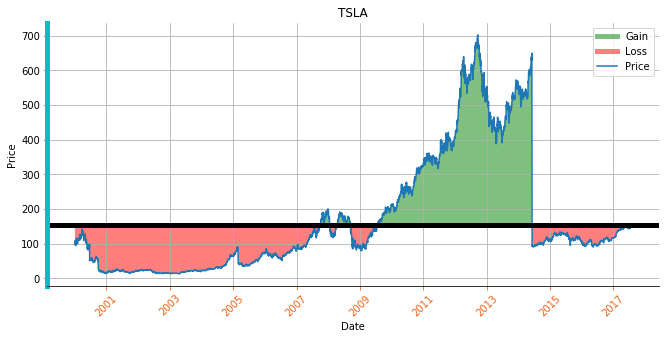

In [8]:
graph_data('TSLA')